In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [227]:
# todo: 'Direct2D' -> also print events (start, render start, render stop)
PROGRAMS = ['getpixel', 'bitblt', 'getdbits', 'windup']
FRAMEWORKS = ['GLEW_SDL', 'SDL2_openGL']

In [228]:
path_dict_app = {}
path_dict_program = {}

for framework in FRAMEWORKS:
    for program in PROGRAMS:
        path_dict_app[f'{framework}_{program}'] = f'data/final_2106__{framework}_{program}_app.csv'
        path_dict_program[f'{framework}_{program}'] = f'data/final_2106__{framework}_{program}_program.csv'

In [229]:
def read_data(program, framework):
    data_in_program = pd.read_csv(path_dict_program[f'{framework}_{program}'])
    data_in_app = pd.read_csv(path_dict_app[f'{framework}_{program}'])
    data_in_program['timestamp'] = data_in_program['timestamp'] / 1000
    data_in_app['timestamp'] = data_in_app['timestamp'] / 1000
    return data_in_app, data_in_program

In [230]:
def preprocess_data(data_in_app, data_in_program):
    data_in_program['color_value'] = -1

    # increment_counter = 0
    # for index_app, row_app in data_in_app.iterrows():
    #     if row_app['event_type'] == 'render_stop':
    #         for index_program, row_program in data_in_program.iterrows():
    #             if row_program['timestamp'] > row_app['timestamp']:
    #                 data_in_program.at[index_program, 'color_value'] += 1

    for i in range (-1, 10):
        timestamp_color_i = data_in_app[(data_in_app['color_value'] == i) & (data_in_app['event_type'] != 'render_stop')]['timestamp']
        data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
    

    # get relative time from start
    start_time = data_in_app[data_in_app['event_type'] == 'start']['timestamp'][0]
    data_in_app['time_since_start'] = data_in_app['timestamp'] - start_time
    data_in_program['time_since_start'] = data_in_program['timestamp'] - start_time

    return data_in_app, data_in_program

In [231]:
data_dict = {}

for framework in FRAMEWORKS:
    for program in PROGRAMS:
        data_in_app, data_in_program = read_data(program, framework)
        data_in_app, data_in_program = preprocess_data(data_in_app, data_in_program)
        data_in_program['program'] = program
        data_in_program['framework'] = framework
        data_dict[f'{program}_{framework}'] = (data_in_app, data_in_program)


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\1614234445.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\1614234445.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\1614234445.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(time

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\1614234445.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_in_program['color_value'] = np.where(data_in_program.timestamp >= float(timestamp_color_i), i-1, data_in_program['color_value'])


In [232]:
data_program = pd.DataFrame()

data_list = []
for key, value in data_dict.items():
    data_list.append(value[1])

data_program = pd.concat(data_list)
# data_program['condition'] = data_program[['program', 'framework']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

data_program

,event_type,timestamp,color_equal,color_value,time_since_start,program,framework
0,got color at,1503257.939,0,0,91.689,getpixel,GLEW_SDL
1,got color at,1503259.777,1,0,93.527,getpixel,GLEW_SDL
2,got color at,1503261.628,1,0,95.378,getpixel,GLEW_SDL
3,got color at,1503263.618,1,0,97.368,getpixel,GLEW_SDL
4,got color at,1503265.610,1,0,99.360,getpixel,GLEW_SDL
...,...,...,...,...,...,...,...
14882,got color at,1549794.935,1,8,715.981,windup,SDL2_openGL
14883,got color at,1549794.943,1,8,715.989,windup,SDL2_openGL
14884,got color at,1549794.951,1,8,715.997,windup,SDL2_openGL
14885,got color at,1549794.959,1,8,716.005,windup,SDL2_openGL


In [233]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'
COLOR_NONE_DARK = '#4E4E4D'

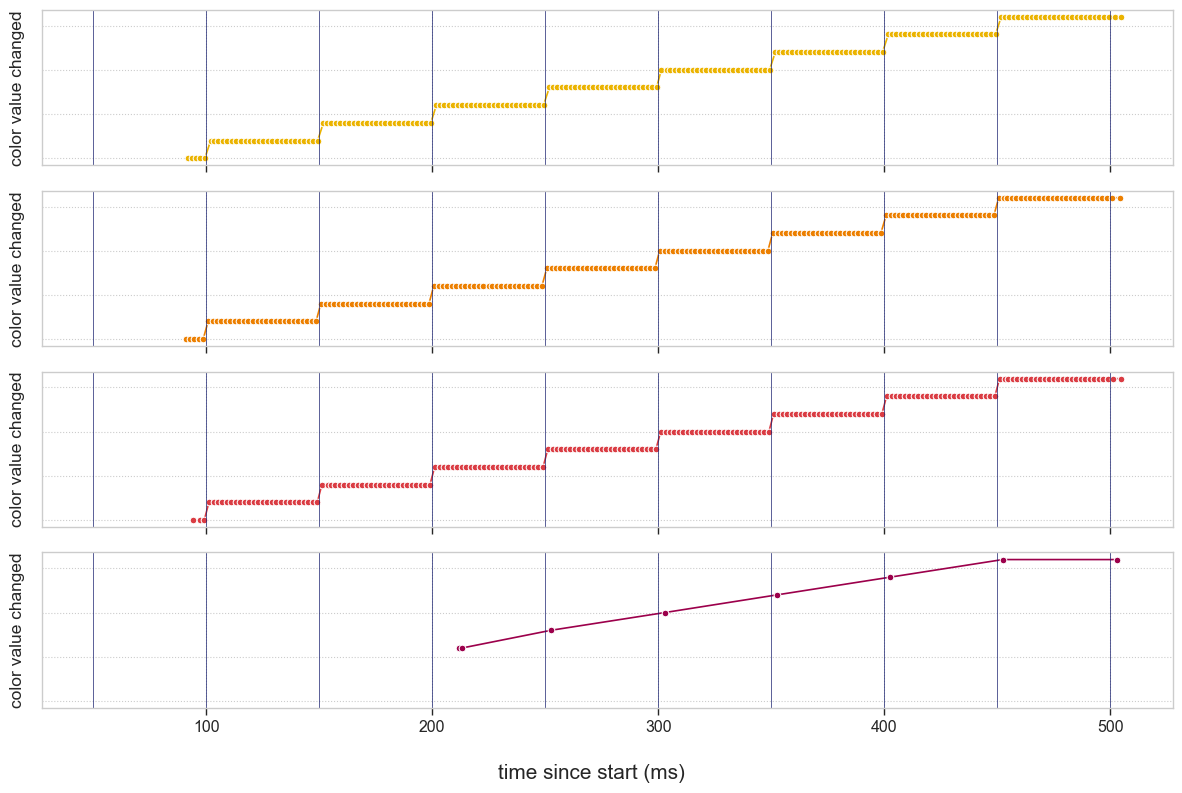

In [234]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(10, 7), "xtick.bottom": True, "grid.linestyle": ":"})
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True)

data_temp = data_program[data_program['time_since_start'] < 505]
data_temp = data_temp[data_temp['framework'] == 'GLEW_SDL']


# getpixel
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
plot = sns.lineplot(ax=axes[0], data=data_getpixel[data_getpixel['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER_ANDI)

data_app_getpixel = data_dict['getpixel_GLEW_SDL'][0]
data_app_getpixel = data_app_getpixel[data_app_getpixel['color_value'] >= 1]

# for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_start']['time_since_start']:
#     axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_stop']['time_since_start']:
    axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# bitblt
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
plot = sns.lineplot(ax=axes[1], data=data_bitblt[data_bitblt['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER)

data_app_bitblt = data_dict['bitblt_GLEW_SDL'][0]
data_app_bitblt = data_app_bitblt[data_app_bitblt['color_value'] >= 1]

# for value in data_app_bitblt[data_app_bitblt['event_type'] == 'render_start']['time_since_start']:
#     axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getpixel[data_app_bitblt['event_type'] == 'render_stop']['time_since_start']:
    axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# getdbits
data_getdbits = data_temp[data_temp['program'] == 'getdbits']
plot = sns.lineplot(ax=axes[2], data=data_getdbits[data_getdbits['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_GLUTROT)

data_app_getdbits = data_dict['getdbits_GLEW_SDL'][0]
data_app_getdbits = data_app_getdbits[data_app_getdbits['color_value'] >= 1]

# for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_start']['time_since_start']:
#     axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_stop']['time_since_start']:
    axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# windup
data_windup = data_temp[data_temp['program'] == 'windup']
plot = sns.lineplot(ax=axes[3], data=data_windup[data_windup['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_HEIDENELKE)

data_app_windup = data_dict['windup_GLEW_SDL'][0]
data_app_windup = data_app_windup[data_app_windup['color_value'] >= 1]

# for value in data_app_windup[data_app_windup['event_type'] == 'render_start']['time_since_start']:
#     axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_windup[data_app_windup['event_type'] == 'render_stop']['time_since_start']:
    axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

fig.supxlabel('time since start (ms)')

axes[0].set_yticklabels('')
axes[1].set_yticklabels('')
axes[2].set_yticklabels('')
axes[3].set_yticklabels('')

axes[0].set_ylabel('color value changed')
axes[1].set_ylabel('color value changed')
axes[2].set_ylabel('color value changed')
axes[3].set_ylabel('color value changed')
axes[3].set_xlabel('')

plt.tight_layout() 
plt.savefig("./figures/validation_GLEW.pdf", format='pdf')


todo: anpassen: on click einmal kurz weiß, dann wieder schwarz. das ist dann der startpunkt -> sollte windup helfen
hab ich eigentlich gemacht, immer noch komisch

In [235]:
data_windup

,event_type,timestamp,color_equal,color_value,time_since_start,program,framework
0,got color at,1522505.488,1,3,211.731,windup,GLEW_SDL
1,got color at,1522507.082,0,3,213.325,windup,GLEW_SDL
2,got color at,1522546.368,0,4,252.611,windup,GLEW_SDL
3,got color at,1522596.586,0,5,302.829,windup,GLEW_SDL
4,got color at,1522646.216,0,6,352.459,windup,GLEW_SDL
5,got color at,1522696.175,0,7,402.418,windup,GLEW_SDL
6,got color at,1522746.214,0,8,452.457,windup,GLEW_SDL
7,got color at,1522796.965,0,8,503.208,windup,GLEW_SDL


In [236]:
print("Analyzing DESKDUP")
for value in data_windup['color_value'].unique():
    render_start_time = data_app_windup[(data_app_windup['color_value'] == value+1) & (data_app_windup['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
    first_value_after_start = data_windup[data_windup['color_value'] == value].iloc[0]['time_since_start']
    print(f'diff render start - color measured for {value}: {first_value_after_start - render_start_time}')

Analyzing DESKDUP
diff render start - color measured for 3: 11.674999999813735
diff render start - color measured for 4: 2.5660000001080334
diff render start - color measured for 5: 2.769999999785796
diff render start - color measured for 6: 2.4140000001061708
diff render start - color measured for 7: 2.3850000000093132
diff render start - color measured for 8: 2.4259999999776483


In [237]:
print("Analyzing GETPIXEL")
for value in data_getpixel['color_value'].unique():
    render_start_time = data_app_getpixel[(data_app_getpixel['color_value'] == value+1) & (data_app_getpixel['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
    first_value_after_start = data_getpixel[data_getpixel['color_value'] == value].iloc[0]['time_since_start']
    print(f'diff render start - color measured for {value}: {first_value_after_start - render_start_time}')

Analyzing GETPIXEL
diff render start - color measured for 0: 41.639999999897555
diff render start - color measured for 1: 1.8819999999832362
diff render start - color measured for 2: 1.7839999999850988
diff render start - color measured for 3: 1.7630000000353903
diff render start - color measured for 4: 1.7609999999403954
diff render start - color measured for 5: 1.3200000000651926
diff render start - color measured for 6: 1.7860000000800937
diff render start - color measured for 7: 1.7860000000800937
diff render start - color measured for 8: 1.7700000000186265


In [238]:
print("Analyzing BITBLT")
for value in data_bitblt['color_value'].unique():
    render_start_time = data_app_bitblt[(data_app_bitblt['color_value'] == value+1) & (data_app_bitblt['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
    first_value_after_start = data_bitblt[data_bitblt['color_value'] == value].iloc[0]['time_since_start']
    print(f'diff render start - color measured for {value}: {first_value_after_start - render_start_time}')

Analyzing BITBLT
diff render start - color measured for 0: 40.84899999992922
diff render start - color measured for 1: 0.7310000001452863
diff render start - color measured for 2: 0.5999999998603016
diff render start - color measured for 3: 0.5779999999795109
diff render start - color measured for 4: 0.6130000001285225
diff render start - color measured for 5: 0.5790000001434237
diff render start - color measured for 6: 0.5829999998677522
diff render start - color measured for 7: 0.8040000000037253
diff render start - color measured for 8: 0.6559999999590218


In [239]:
print("Analyzing GETDBITS")
for value in data_getdbits['color_value'].unique():
    render_start_time = data_app_getdbits[(data_app_getdbits['color_value'] == value+1) & (data_app_getdbits['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
    first_value_after_start = data_getdbits[data_getdbits['color_value'] == value].iloc[0]['time_since_start']
    print(f'diff render start - color measured for {value}: {first_value_after_start - render_start_time}')

Analyzing GETDBITS
diff render start - color measured for 0: 44.243999999947846
diff render start - color measured for 1: 1.1119999999646097
diff render start - color measured for 2: 1.1030000001192093
diff render start - color measured for 3: 1.0249999999068677
diff render start - color measured for 4: 1.084999999962747
diff render start - color measured for 5: 1.0659999998752028
diff render start - color measured for 6: 1.0139999999664724
diff render start - color measured for 7: 1.0260000000707805
diff render start - color measured for 8: 1.0320000001229346


getdbits hier jetzt glück: guten zeitpunkt im circle erraten

- bei ner zweiten messung, sieht das ggf schon ganz ander aus
- DESKDUP womöglich immer so weil ja wartet auf änderung und nicht kontinuierlich abfragt
- gdi readers: "großer" unterschied zwischen best und worst case, DESDUP verlässlicher averange case
- random zeitintervalle wichtig beim messen, sonst genau dieser effekt

In [240]:
# print(f'{1/500 * 1000}')
# for i in range(1, 9):
#     num_measurements = len(data_in_program[data_in_program['color_value'] == i])
#     print(f'color value {i}: {num_measurements} measurements -> every {50 / num_measurements}ms')

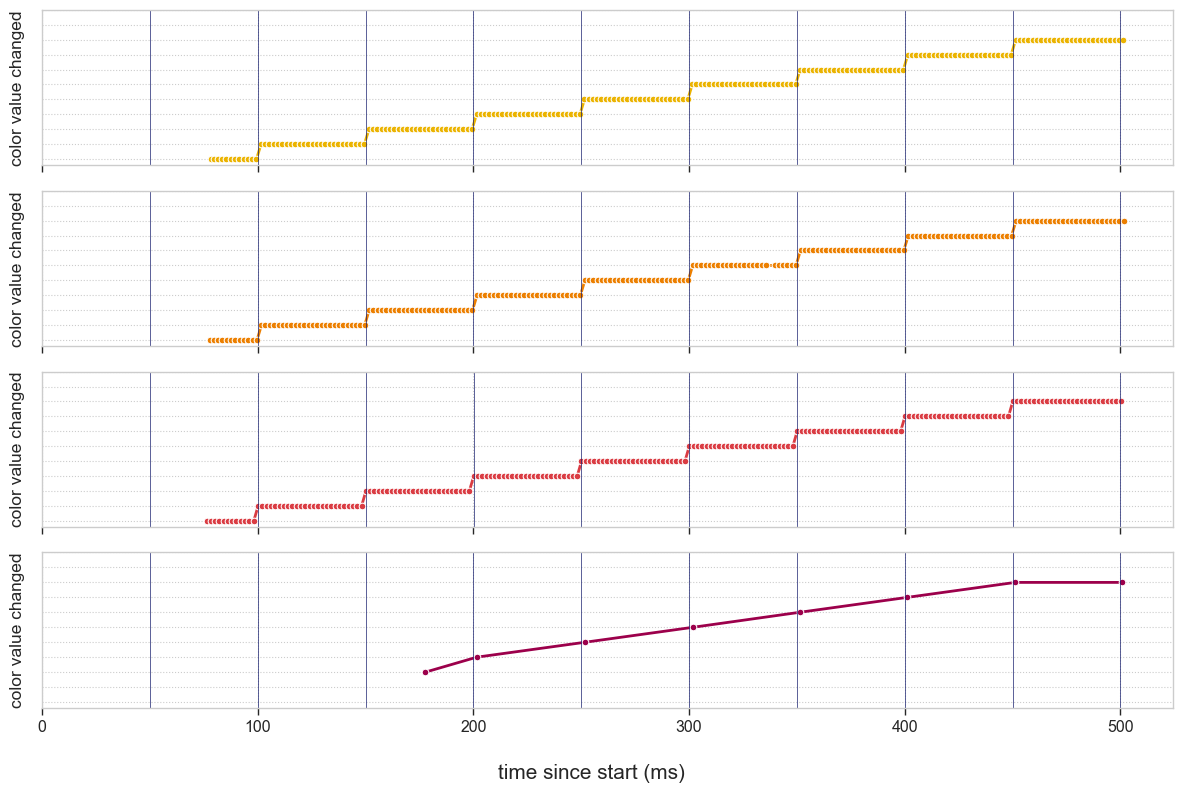

In [241]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(10, 7), "xtick.bottom": True, "grid.linestyle": ":"})
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True)

data_temp = data_program[data_program['time_since_start'] < 505]
data_temp = data_temp[data_temp['framework'] == 'SDL2_openGL']


# for i in range(9):
#     if i % 2 == 0:
#         axes[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[2].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axes[3].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axes[0].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[1].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[2].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)
# axes[3].set_ylim(-0.5, len(data_temp['color_value'].unique()) - 0.5)


# getpixel
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
plot = sns.lineplot(ax=axes[0], data=data_getpixel[data_getpixel['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER_ANDI, linewidth=2)

data_app_getpixel = data_dict['getpixel_SDL2_openGL'][0]
data_app_getpixel = data_app_getpixel[data_app_getpixel['color_value'] > 0]

# for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_start']['time_since_start']:
#     axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getpixel[data_app_getpixel['event_type'] == 'render_stop']['time_since_start']:
    axes[0].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# bitblt
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
plot = sns.lineplot(ax=axes[1], data=data_bitblt[data_bitblt['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_OCKER, linewidth=2)

data_app_bitblt = data_dict['bitblt_SDL2_openGL'][0]
data_app_bitblt = data_app_bitblt[data_app_bitblt['color_value'] > 0]

# for value in data_app_bitblt[data_app_bitblt['event_type'] == 'render_start']['time_since_start']:
#     axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_bitblt[data_app_bitblt['event_type'] == 'render_stop']['time_since_start']:
    axes[1].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# getdbits
data_getdbits = data_temp[data_temp['program'] == 'getdbits']
plot = sns.lineplot(ax=axes[2], data=data_getdbits[data_getdbits['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_GLUTROT, linewidth=2)

data_app_getdbits = data_dict['getdbits_SDL2_openGL'][0]
data_app_getdbits = data_app_getdbits[data_app_getdbits['color_value'] > 0]

# for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_start']['time_since_start']:
#     axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_getdbits[data_app_getdbits['event_type'] == 'render_stop']['time_since_start']:
    axes[2].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)


# windup
data_windup = data_temp[data_temp['program'] == 'windup']
plot = sns.lineplot(ax=axes[3], data=data_windup[data_windup['color_value'] >= 0], x='time_since_start', y='color_value', marker='o', color=COLOR_HEIDENELKE, linewidth=2)

data_app_windup = data_dict['windup_SDL2_openGL'][0]
data_app_windup = data_app_windup[data_app_windup['color_value'] > 0]

# for value in data_app_windup[data_app_windup['event_type'] == 'render_start']['time_since_start']:
#     axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

for value in data_app_windup[data_app_windup['event_type'] == 'render_stop']['time_since_start']:
    axes[3].axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

fig.supxlabel('time since start (ms)')

# axes[0].set_yticklabels('')
# axes[1].set_yticklabels('')
# axes[2].set_yticklabels('')
# axes[3].set_yticklabels('')

axes[0].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
axes[1].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
axes[2].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])
axes[3].set_yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['', '', '', '', '', '', '', '', '', '', '',])

axes[0].set_ylabel('color value changed')
axes[1].set_ylabel('color value changed')
axes[2].set_ylabel('color value changed')
axes[3].set_ylabel('color value changed')
axes[3].set_xlabel('')

axes[3].set_xlim(left=0)

plt.tight_layout() 
plt.savefig("./figures/validation_SDL.pdf", format='pdf')


In [242]:
from statistics import mean

In [251]:
print("Analyzing DESKDUP")
diff_list = []
for value in data_windup['color_value'].unique():
    if value != 2:  # todo
        render_start_time = data_app_windup[(data_app_windup['color_value'] == value+1) & (data_app_windup['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_windup[data_windup['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_windup['color_value'].unique():
    if value != 2:
        num_measurements_for_value = data_windup[data_windup['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_windup['time_since_last'] = data_windup['time_since_start'].diff()
print(data_windup['time_since_last'].mean())
data_windup['time_since_last']

Analyzing DESKDUP
diff render start - color measured for 3: 1.493999999947846
diff render start - color measured for 4: 1.8360000001266599
diff render start - color measured for 5: 1.8500000000931323
diff render start - color measured for 6: 1.2390000000596046
diff render start - color measured for 7: 1.220000000204891
diff render start - color measured for 8: 1.240999999921769
mean difference to fw upadte: 1.4800000000589837
---------------------------------------
1 measurements for color value 3
1 measurements for color value 4
1 measurements for color value 5
1 measurements for color value 6
1 measurements for color value 7
2 measurements for color value 8
46.1721428571535


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\2569110285.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_windup['time_since_last'] = data_windup['time_since_start'].diff()


0       NaN
1    23.823
2    50.316
3    50.020
4    49.377
5    49.978
6    50.022
7    49.669
Name: time_since_last, dtype: float64

In [244]:
print("Analyzing GETPIXEL")
diff_list = []
for value in data_getpixel['color_value'].unique():
    if value != 0:
        render_start_time = data_app_getpixel[(data_app_getpixel['color_value'] == value+1) & (data_app_getpixel['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_getpixel[data_getpixel['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_getpixel['color_value'].unique():
    if value != 0:
        num_measurements_for_value = data_getpixel[data_getpixel['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_getpixel['time_since_last'] = data_getpixel['time_since_start'].diff()
data_getpixel['time_since_last'].mean()


Analyzing GETPIXEL
diff render start - color measured for 1: 1.459999999962747
diff render start - color measured for 2: 1.5649999999441206
diff render start - color measured for 3: 1.4320000000298023
diff render start - color measured for 4: 1.4799999999813735
diff render start - color measured for 5: 1.4649999998509884
diff render start - color measured for 6: 1.5010000001639128
diff render start - color measured for 7: 1.45699999993667
diff render start - color measured for 8: 1.4709999999031425
mean difference to fw upadte: 1.4788749999715947
---------------------------------------
25 measurements for color value 1
25 measurements for color value 2
25 measurements for color value 3
25 measurements for color value 4
25 measurements for color value 5
25 measurements for color value 6
25 measurements for color value 7
26 measurements for color value 8


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\4080422496.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_getpixel['time_since_last'] = data_getpixel['time_since_start'].diff()


1.9959103773591846

In [245]:
print("Analyzing BITBLT")
diff_list = []
for value in data_bitblt['color_value'].unique():
    if value != 0:
        render_start_time = data_app_bitblt[(data_app_bitblt['color_value'] == value+1) & (data_app_bitblt['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_bitblt[data_bitblt['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_bitblt['color_value'].unique():
    if value != 0:
        num_measurements_for_value = data_bitblt[data_bitblt['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_bitblt['time_since_last'] = data_bitblt['time_since_start'].diff()
data_bitblt['time_since_last'].mean()

Analyzing BITBLT
diff render start - color measured for 1: 1.6660000002011657
diff render start - color measured for 2: 1.628000000026077
diff render start - color measured for 3: 1.634000000078231
diff render start - color measured for 4: 1.6729999999515712
diff render start - color measured for 5: 1.6730000001844019
diff render start - color measured for 6: 1.662999999942258
diff render start - color measured for 7: 1.6769999999087304
diff render start - color measured for 8: 1.6669999998994172
mean difference to fw upadte: 1.6601250000239816
---------------------------------------
25 measurements for color value 1
25 measurements for color value 2
25 measurements for color value 3
25 measurements for color value 4
24 measurements for color value 5
25 measurements for color value 6
25 measurements for color value 7
26 measurements for color value 8


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\4020165246.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bitblt['time_since_last'] = data_bitblt['time_since_start'].diff()


2.007492890995287

In [246]:
print("Analyzing GETDBITS")
diff_list = []
for value in data_getdbits['color_value'].unique():
    if value != 0:
        render_start_time = data_app_getdbits[(data_app_getdbits['color_value'] == value+1) & (data_app_getdbits['event_type'] == 'render_stop')]['time_since_start'].iloc[0]
        first_value_after_start = data_getdbits[data_getdbits['color_value'] == value].iloc[0]['time_since_start']
        diff = first_value_after_start - render_start_time
        print(f'diff render start - color measured for {value}: {diff}')
        diff_list.append(diff)
print(f'mean difference to fw upadte: {mean(diff_list)}')

print('---------------------------------------')
for value in data_getdbits['color_value'].unique():
    if value != 0:
        num_measurements_for_value = data_getdbits[data_getdbits['color_value'] == value]['time_since_start'].count()
        print(f'{num_measurements_for_value} measurements for color value {value}')

data_getdbits['time_since_last'] = data_getdbits['time_since_start'].diff()
data_getdbits['time_since_last'].mean()

Analyzing GETDBITS
diff render start - color measured for 1: 0.09000000008381903
diff render start - color measured for 2: 0.09799999999813735
diff render start - color measured for 3: 0.08199999993667006
diff render start - color measured for 4: 0.09100000001490116
diff render start - color measured for 5: 0.060999999986961484
diff render start - color measured for 6: 0.10100000002421439
diff render start - color measured for 7: 0.10699999984353781
diff render start - color measured for 8: 0.10600000014528632
mean difference to fw upadte: 0.09200000000419095
---------------------------------------
25 measurements for color value 1
25 measurements for color value 2
25 measurements for color value 3
25 measurements for color value 4
25 measurements for color value 5
25 measurements for color value 6
25 measurements for color value 7
26 measurements for color value 8


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_3544\1942429926.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_getdbits['time_since_last'] = data_getdbits['time_since_start'].diff()


1.9979905660378412